In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# LFVHD Scotogenic model 
## Diagrams
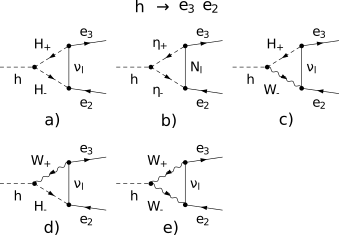

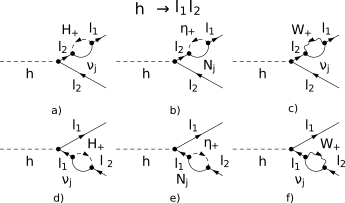

Our conventions to this Feynman diagrams are shown below

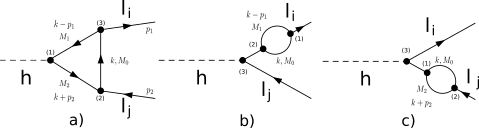

## Couplings

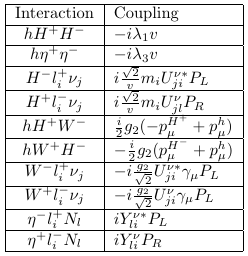

In [2]:
from sympy import symbols, init_printing, conjugate,I,IndexedBase,sqrt,collect,simplify
init_printing()

In [3]:
import OneLoopLFVHD as lfvhd

In [4]:
mh,mi,mj = lfvhd.ma,lfvhd.mi,lfvhd.mj
mh,mi,mj

## Light neutrino contribution 

### FSS contribution

We have two posibles diagrams with this form the first one is $\nu_l H^{+} H^{-}$, then we need the next couplings
$h H^{+} H^{-} \rightarrow -i \lambda_1 v$, $H^{-}\mu^{+} \nu_{l} \rightarrow i \frac{\sqrt{2}}{v} m_2 U^{\nu *}_{l2} P_{L}$ and 
$H^{+}\tau^{-} \nu_{l} \rightarrow i \frac{\sqrt{2}}{v} m_1 U^{\nu}_{l3} P_{R}$ assuming summation on repeated indexes

In [5]:
triangulo = {'a':0}

In [6]:
g2,v = symbols(r'g2,v',real=True)
λ1 = mh**2/v**2
U = IndexedBase(r'U')
l,b,i,j = symbols('l,b,i,j',integer=True)
hHuHd = lfvhd.VertexHSS(-I*λ1*v)
Hdμνl = lfvhd.VertexSFF(0,I*(sqrt(2)/v)*mj*conjugate(U[l,j]))
Huτνl = lfvhd.VertexSFF(I*(sqrt(2)/v)*mi*U[l,i],0)

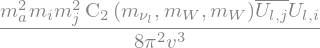

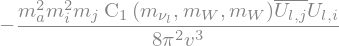

In [13]:
mnul,mH,mW = symbols(r'm_{{\nu_l}},m_{{H^{\pm}}},m_W',real=True)

νlHuHd = lfvhd.TriangleFSS(hHuHd,Hdμνl,Huτνl,[mnul,mW,mW])
triangulo['νlHuHd'] = νlHuHd
νlHuHd.AR()#.subs(cambiosDivFin(*νlHuHd.masas)).simplify()#.subs(
    #cambios_aprox((*νlHuHd.masas)))#.subs(cambiosMs).subs(cambiomnuHW).subs(masas_valor).n()
νlHuHd.AL()

In [8]:
MLs = [0]*10
MRs = [0]*10

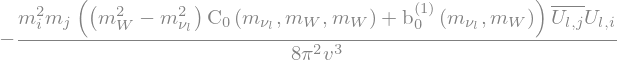

In [9]:
MLs[0] = νlHuHd.AL_GIM()
MLs[0]

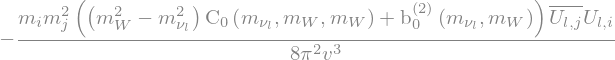

In [10]:
MRs[0] = νlHuHd.AR_GIM()
MRs[0]

## FSV contribution
In this case we only have one contribution, $\nu_{l} H^{+} W^{-}$, the we need to consider the next couplings
$h H^{+} W^{-} \rightarrow -\frac{i}{2}g_2 (p^{H^{+}}_\mu - p^{h}_\mu)$, $W^{-} \mu^{+} \nu_{l} \rightarrow -i \frac{g_2}{\sqrt{2}}U^{\nu *}_{l2} \gamma_\mu P_L$ and $ H^{+} \tau^{-} \nu_l \rightarrow i Y^{e*}_{3,b}U^{\nu}_{lb} P_R$

In [14]:
hHuWd = lfvhd.VertexHSpVm(-I*g2/2)
Wdμνl = lfvhd.VertexVFF(0,-I*(g2/sqrt(2))*conjugate(U[l,j]))
#Huτνl

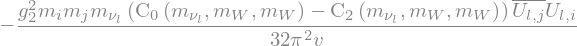

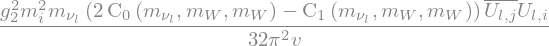

In [15]:
mW = symbols('m_W',real=True)

νlHuWd = lfvhd.TriangleFSV(hHuWd,Wdμνl,Huτνl,[mnul,mW,mW])
triangulo['νlHuWd'] = νlHuWd
νlHuWd.AR().factor()
νlHuWd.AL().factor()

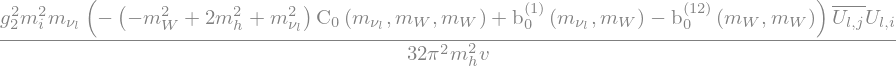

In [13]:
#νlHuWd.ML_GIM()
MLs[1] = νlHuWd.AL_GIM()
MLs[1]
#.subs(cambiosDivFin).simplify().subs(cambios_aprox).subs(cambiosMs).subs(cambim_2M_0(omnuHW).subs(masas_valor).n()

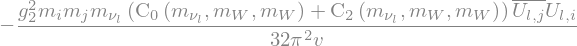

In [14]:
νlHuWd.AR()#.subs({B2_1(mnul,mW):PaVetoDivFin(B2_1(mnul,mW)),
           #       B2_0(mnul,mW):PaVetoDivFin(B2_0(mnul,mW))}).expand().simplify()

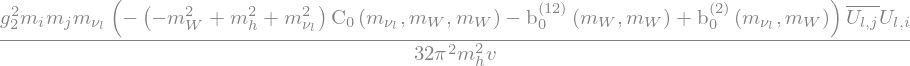

In [15]:
MRs[1] = νlHuWd.AR_GIM()
MRs[1]

## FVS contribution
In this case we only have one contribution too, $\nu_{l} W^{+} H^{-}$, the we need to consider the next couplings
$h W^{+} H^{-} \rightarrow -\frac{i}{2}g_2 (-p^{H^{-}}_\mu + p^{h}_\mu)$, $ H^{-} \mu^{+} \nu_l \rightarrow i U^{\nu *}_{lb} Y^{e}_{2b}P_L$ and $W^{+} \tau^{-} \nu_{l} \rightarrow -i \frac{g_2}{\sqrt{2}}U^{\nu}_{l3} \gamma_\mu P_L$

In [17]:
hWuHd = lfvhd.VertexHVpSm(-I*g2/2)
#Hdμνl
Wuτνl = lfvhd.VertexVFF(0,-I*(g2/sqrt(2))*U[l,i])


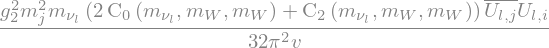

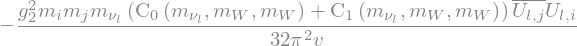

In [18]:

νlWuHd = lfvhd.TriangleFVS(hWuHd,Hdμνl,Wuτνl,[mnul,mW,mW])
triangulo['νlWuHd'] = νlWuHd
νlWuHd.AR()
νlWuHd.AL()#.subs(cambiosDivFin(*Masas4)).simplify()

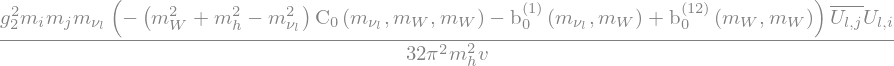

In [18]:
#collect(collect(νlWuHd.ML().expand(),[mnul],evaluate=False)[mnul].simplify(),νlWuHd.Cs,simplify)
MLs[2] = νlWuHd.AL_GIM()
MLs[2]

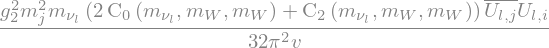

In [19]:
νlWuHd.AR()

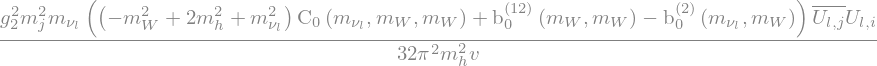

In [20]:
MRs[2] = νlWuHd.AR_GIM()
MRs[2]
#νlWuHd.MR().subs(cambiosDivFin(mnul,mW,mH))

## FVV contribution
In this case we only have one contribution too, $\nu_{l} W^{+} W^{-}$, the we need to consider the next couplings
$h W^{+} W^{-} \rightarrow \frac{i}{2}g_2^2 v g_{\mu \nu}$, $ W^{-} \mu^{+} \nu_l \rightarrow -i \frac{g_2}{\sqrt{2}}U^{\nu*}_{l2} \gamma_\mu P_L$ and $W^{+} \tau^{-} \nu_{l} \rightarrow -i \frac{g_2}{\sqrt{2}}U^{\nu}_{l3} \gamma_\mu P_L$

In [19]:
hWuWd = lfvhd.VertexHVV(I*g2**2/2*v)
Wdμνl = lfvhd.VertexVFF(0,-I*(g2/sqrt(2))*conjugate(U[l,j]))
#Wuτνl 

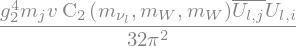

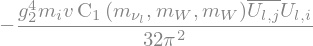

In [26]:
νlWuWd = lfvhd.TriangleFVV(hWuWd,Wdμνl,Wuτνl,[mnul,mW,mW])
triangulo['νlWuWd'] = νlWuWd
νlWuWd.AR().subs({lfvhd.D:4})
νlWuWd.AL().subs({lfvhd.D:4})#.subs(cambiosDivFin(*νlWuWd.masas)).simplify().subs(D,4)
#print('-'*200)

In [20]:
MLs[3] = νlWuWd.AL_GIM().subs(lfvhd.D,4)
ep = symbols(r'\epsilon',real=True)
MLs[3].simplify()

NameError: name 'MLs' is not defined

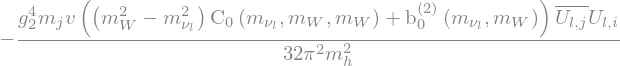

In [23]:
MRs[3] = νlWuWd.AR_GIM().subs(lfvhd.D,4)
MRs[3].simplify()

In [24]:
del triangulo['a']

## Adding all triangle

In [25]:
#ContTL = sum(triangulo[t].ML().subs(cambiosDivFin(*triangulo[t].masas)).subs(cambios_aprox(*triangulo[t].masas)) for t in triangulo.keys()).subs(D,4)#.subs(cambios_aprox(*triangulo[t].masas))
#ContTL = sum(t for t in ContTL.expand().args if t.has(mnul))#.factor()
#ContTR = sum(triangulo[t].MR().subs(cambiosDivFin(*triangulo[t].masas)).subs(cambios_aprox(*triangulo[t].masas)) for t in triangulo.keys()).subs(D,4)#.subs(cambios_aprox(*triangulo[t].masas))
#ContTR = sum(t for t in ContTR.expand().args if t.has(mnul))#.factor()

In [26]:
#ContTL.subs(mH,mW)

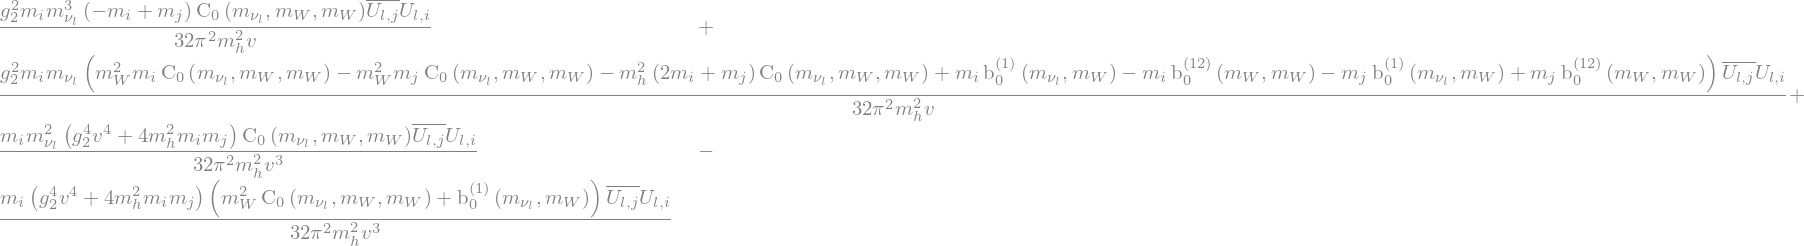

In [27]:
sum(triangulo[t].AL_GIM() for t in triangulo.keys()).subs(lfvhd.D,4).expand().collect(mnul,simplify)

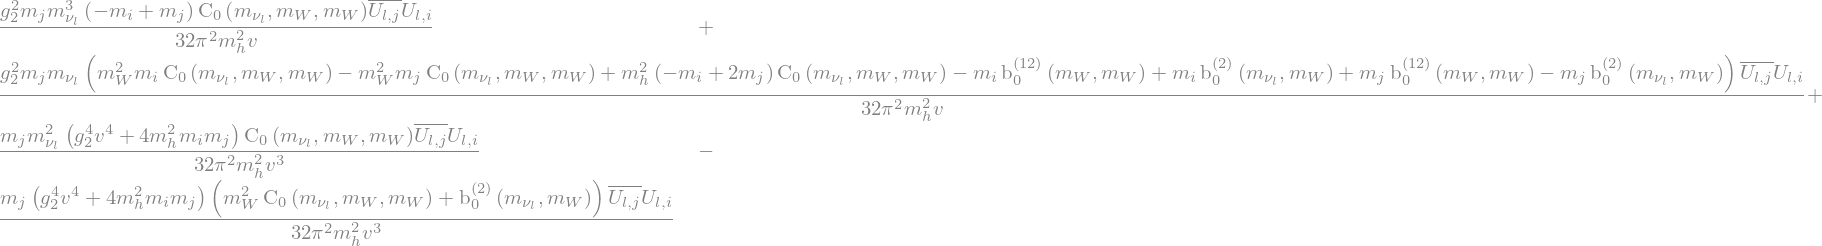

In [28]:
sum(triangulo[t].AR_GIM() for t in triangulo.keys()).subs(lfvhd.D,4).expand().collect(mnul,simplify)

In [29]:
ContTL = sum(triangulo[t].AL_GIM().subs(lfvhd.cambios_aprox(*triangulo[t].masas)) for t in triangulo.keys()).subs(lfvhd.D,4)
ContTL = sum(t for t in ContTL.expand().args if t.has(mnul))
ContTR = sum(triangulo[t].AR_GIM().subs(lfvhd.cambios_aprox(*triangulo[t].masas)) for t in triangulo.keys()).subs(lfvhd.D,4)
ContTR = sum(t for t in ContTL.expand().args if t.has(mnul))

In [30]:
#ContTL

# Burbujas

This process also have Bubbles
## FV contribution
In this case we only have one contribution too, $\nu_{a} W^{+}$, the we need to consider the next couplings
$h e_{2} e_{2} \rightarrow \frac{ig m_2}{2\sqrt{2}m_W}$, $W^{+} \tau^{-} \nu_{a} \rightarrow i \frac{g}{\sqrt{2}}U^{\nu}_{1a} \gamma_\mu P_L$ and $ W^{-} \mu^{+} \nu_{a} \rightarrow i \frac{g}{\sqrt{2}}U^{\nu*}_{2a} \gamma_\nu P_L$ 

In [31]:
burbuja = {'a':0}

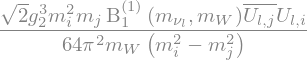

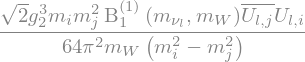

In [25]:
hljlj = lfvhd.VertexHFF((I*g2*mj)/(2*sqrt(2)*mW))

nulWu = lfvhd.BubbleFV(hljlj,Wuτνl,Wdμνl ,[mnul,mW])
MLL1 = nulWu.AL().subs({lfvhd.D:4}).subs({lfvhd.A0(mW):lfvhd.PaVetoDivFin(lfvhd.A0(mW)),
                                          lfvhd.B1_1(mnul,mW):lfvhd.PaVetoDivFin(lfvhd.B1_1(mnul,mW)),
                             lfvhd.B1_0(mnul,mW):lfvhd.PaVetoDivFin(lfvhd.B1_0(mnul,mW))}).expand()
nulWu.AR().subs({lfvhd.D:4})
nulWu.AL().subs({lfvhd.D:4})

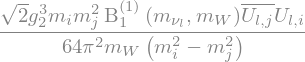

In [33]:
#PaVetoDivFin(B1_0(mnul,mW))
#PaVetoDivFin(B1_1(mnul,mW))
MLL1 = nulWu.AL().subs({lfvhd.D:4})#.subs({A0(mW):PaVetoDivFin(A0(mW)),B1_1(mnul,mW):PaVetoDivFin(B1_1(mnul,mW)),
                       #      B1_0(mnul,mW):PaVetoDivFin(B1_0(mnul,mW))})
MLL1

## ML

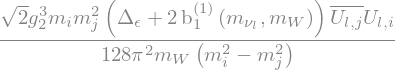

In [34]:
nulWu.AL().subs(lfvhd.cambiosDivFin(mnul,mW,mW)).simplify().subs(lfvhd.D,4)

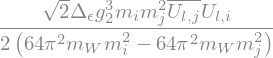

In [35]:
divLnuW = collect(MLL1.subs(lfvhd.B1_1(mnul,mW),lfvhd.PaVetoDivFin(lfvhd.B1_1(mnul,mW))).expand(),
                  [lfvhd.Δe],evaluate=False)[lfvhd.Δe]*lfvhd.Δe
divLnuW

## MR


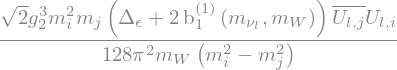

In [36]:
nulWu.AR().subs(lfvhd.cambiosDivFin(mnul,mW,mW)).simplify().subs(lfvhd.D,4)

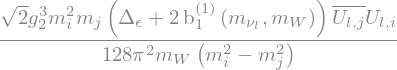

In [37]:
MRR1 = nulWu.AR().subs({lfvhd.D:4}).subs({lfvhd.B1_1(mnul,mW):lfvhd.PaVetoDivFin(lfvhd.B1_1(mnul,mW))}
                                        ).expand()
MRR1.simplify()

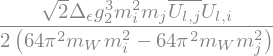

In [38]:
divRnuW = collect(MRR1.expand(),[lfvhd.Δe],evaluate=False)[lfvhd.Δe]*lfvhd.Δe
divRnuW

## Contributino VF

In [30]:
hlili = lfvhd.VertexHFF((I*g2*mi)/(2*sqrt(2)*mW))
Wunul = lfvhd.BubbleVF(hlili,Wuτνl,Wdμνl ,[mnul,mW])

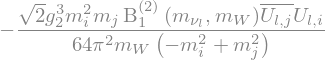

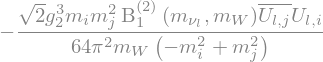

In [33]:
Wunul.AR().subs({lfvhd.D:4})
Wunul.AL().subs({lfvhd.D:4})#.subs({A0(mW):PaVetoDivFin(A0(mW)),B2_1(mnul,mW):PaVetoDivFin(B2_1(mnul,mW)),
                      #       B2_0(mnul,mW):PaVetoDivFin(B2_0(mnul,mW))})

In [28]:
burbuja['nulWuL'] = nulWu.AL() +  Wunul.AL()
burbuja['nulWuR'] = nulWu.AR() +  Wunul.AR()
MLL2 = Wunul.AL().subs({lfvhd.D:4}).subs({lfvhd.A0(mW):lfvhd.PaVetoDivFin(lfvhd.A0(mW)),
                             lfvhd.B2_1(mnul,mW):lfvhd.PaVetoDivFin(lfvhd.B2_1(mnul,mW)),
                             lfvhd.B2_0(mnul,mW):lfvhd.PaVetoDivFin(lfvhd.B2_0(mnul,mW))}).expand()

NameError: name 'burbuja' is not defined

## ML

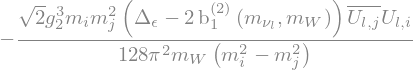

In [41]:
Wunul.AL().subs(lfvhd.cambiosDivFin(mnul,mW,mW)).simplify().subs(lfvhd.D,4)

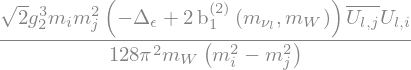

In [42]:
MLL2.simplify()

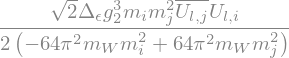

In [43]:
divLWnu = collect(MLL2,[lfvhd.Δe],evaluate=False)[lfvhd.Δe]*lfvhd.Δe
divLWnu

## MR

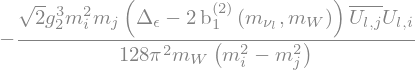

In [44]:
Wunul.AR().subs(lfvhd.cambiosDivFin(mnul,mW,mW)).simplify().subs(lfvhd.D,4)

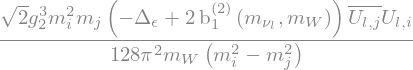

In [45]:
MRR2 = Wunul.AR().subs({lfvhd.D:4}).subs({lfvhd.A0(mW):lfvhd.PaVetoDivFin(lfvhd.A0(mW)),
                                          lfvhd.B2_1(mnul,mW):lfvhd.PaVetoDivFin(lfvhd.B2_1(mnul,mW)),
                             lfvhd.B2_0(mnul,mW):lfvhd.PaVetoDivFin(lfvhd.B2_0(mnul,mW))}).expand()
MRR2.simplify()

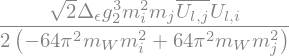

In [46]:
divRWnu =collect(MRR2,[lfvhd.Δe],evaluate=False)[lfvhd.Δe]*lfvhd.Δe
divRWnu

### Pruebas burbujas FV y VF

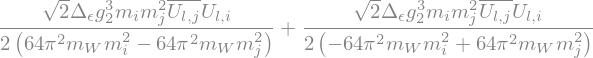

In [47]:
divLnuW + divLWnu
(divLnuW + divLWnu).simplify()

## FS contribution
In this case we only have one contribution too, $\nu_{a} H^{+}$, the we need to consider the next couplings
$h e_{2} e_{2} \rightarrow \frac{ig m_2}{2\sqrt{2}m_W}$, $H^{+}\tau^{-} \nu_{l} \rightarrow i \frac{\sqrt{2}}{v} m_1 U^{\nu}_{l3} P_{R}$ and $H^{-}\mu^{+} \nu_{l} \rightarrow i \frac{\sqrt{2}}{v} m_2 U^{\nu *}_{l2} P_{L}$

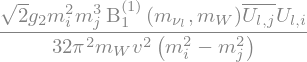

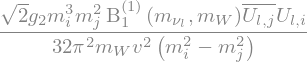

In [35]:
#Hdμνl,Huτνl
nulH = lfvhd.BubbleFS(hljlj,Huτνl,Hdμνl,[mnul,mW])
nulH.AR()
nulH.AL()

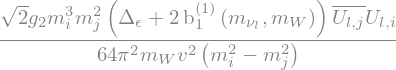

In [34]:
nulH.AL().subs(lfvhd.cambiosDivFin(mnul,mW,mW)).simplify()

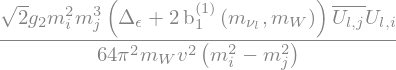

In [49]:
nulH.AR().subs(lfvhd.cambiosDivFin(mnul,mW,mW)).simplify()

## SF contribution
In this case we only have one contribution too, $H^{+} \nu_{l}$, the we need to consider the next couplings
$h e_{1} e_{1} \rightarrow \frac{ig m_1}{2\sqrt{2}m_W}$, $H^{+}\tau^{-} \nu_{l} \rightarrow i \frac{\sqrt{2}}{v} m_1 U^{\nu}_{l3} P_{R}$ and $H^{-}\mu^{+} \nu_{l} \rightarrow i \frac{\sqrt{2}}{v} m_2 U^{\nu *}_{l2} P_{L}$

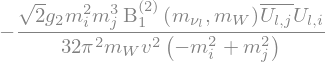

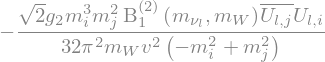

In [36]:
Hnul = lfvhd.BubbleSF(hlili,Huτνl,Hdμνl,[mnul,mW])
Hnul.AR()
Hnul.AL()

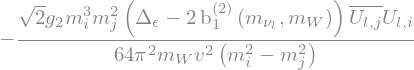

In [50]:
burbuja['nulHL'] = nulH.AL() + Hnul.AL()
burbuja['nulHR'] = nulH.AR() + Hnul.AR()
Hnul.AL().subs(lfvhd.cambiosDivFin(mnul,mW,mW)).simplify()

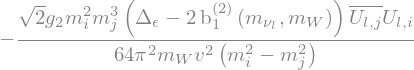

In [51]:
Hnul.AR().subs(lfvhd.cambiosDivFin(mnul,mW,mW)).simplify()

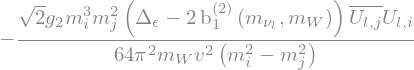

In [52]:
(Hnul.AL()).subs({lfvhd.B1_1(mnul,mW):lfvhd.PaVetoDivFin(lfvhd.B1_1(mnul,mW)),
                              lfvhd.B2_1(mnul,mW):lfvhd.PaVetoDivFin(lfvhd.B2_1(mnul,mW))}).simplify()

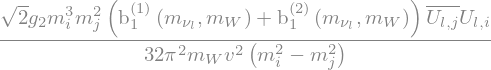

In [53]:
(nulH.AL() + Hnul.AL()).subs({lfvhd.B1_1(mnul,mW):lfvhd.PaVetoDivFin(lfvhd.B1_1(mnul,mW)),
                              lfvhd.B2_1(mnul,mW):lfvhd.PaVetoDivFin(lfvhd.B2_1(mnul,mW))}).simplify()

In [54]:
del burbuja['a']

In [55]:
burbuja.keys()

dict_keys(['nulWuL', 'nulWuR', 'nulHL', 'nulHR'])

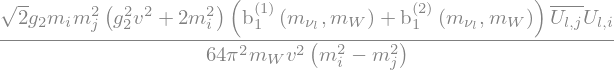

In [56]:
sum(burbuja[B].subs(lfvhd.cambiosDivFin(mnul,mW,mW)).subs(lfvhd.D,4) for B in ['nulWuL','nulHL']
   ).expand().collect(mnul,simplify)

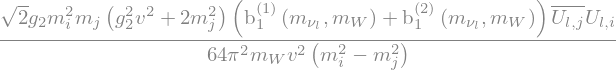

In [57]:
sum(burbuja[B].subs(lfvhd.cambiosDivFin(mnul,mW,mW)).subs(lfvhd.D,4) for B in ['nulWuR','nulHR']
   ).expand().collect(mnul,simplify)

## Adding all bubbles

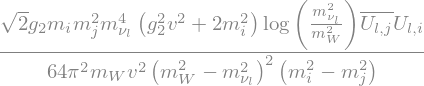

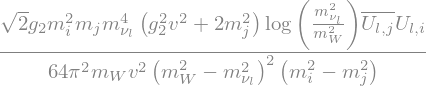

In [58]:
ContBL = (burbuja['nulWuL'].subs(lfvhd.cambiosDivFin(mnul,mW,mW)).subs(
    lfvhd.cambios_aprox(mnul,mW,mW)) + burbuja['nulHL'].subs(lfvhd.cambiosDivFin(mnul,mW,mW)).subs(
    lfvhd.cambios_aprox(mnul,mW,mW))).subs(lfvhd.D,4).simplify()
ContBL
ContBR = (burbuja['nulWuR'].subs(lfvhd.cambiosDivFin(mnul,mW,mW)).subs(
    lfvhd.cambios_aprox(mnul,mW,mW)) + burbuja['nulHR'].subs(lfvhd.cambiosDivFin(mnul,mW,mW)).subs(
    lfvhd.cambios_aprox(mnul,mW,mW))).subs(lfvhd.D,4).simplify()
ContBR

## $M_L$ Total

In [59]:
valores ={mW:80.379,mh:125,mi:1.777,mj:0.1507,v:246,g2:(2*80.379)/(246),λ1:(125)**2/(246)**2}
MLtot = (ContTL + ContBL).subs(valores).n()
MRtot = (ContTR + ContBR).subs(valores).n()

In [60]:
#MLtot

In [61]:
MLmnul = MLtot.collect(mnul,evaluate=False)[mnul]*mnul + MLtot.collect(mnul,evaluate=False)[1]

In [62]:
MLmnu0 = MLtot.collect(mnul,evaluate=False)[1].simplify()
#MLmnu0

In [63]:
MRmnu0 = MRtot.collect(mnul,evaluate=False)[1].simplify()
MRmnul = MRtot.collect(mnul,evaluate=False)[1].simplify() + MRtot.collect(mnul,evaluate=False)[mnul]*mnul


In [64]:
from OneLoopLFVHD.neutrinos import NuOscObservables, UpmnsStandardParametrization

In [65]:
Nudata = NuOscObservables
d21 = Nudata.squareDm21.central
d21
d31 = Nudata.squareDm31.central
d31


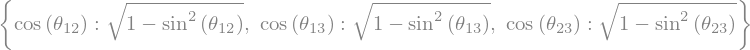

In [68]:
from sympy import sin, cos

θ12,θ13,θ23 = symbols(r'\theta_{12},\theta_{13},\theta_{23}')
cambiospmns = {sin(θ12):sqrt(Nudata.sin2theta12.central).n(),
              sin(θ13):sqrt(Nudata.sin2theta13.central).n(),
              sin(θ23):sqrt(Nudata.sin2theta23.central).n()}
cambios_cos = {cos(th):sqrt(1-sin(th)**2) for th in [θ12,θ13,θ23]}
cambios_cos

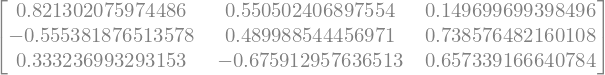

In [69]:
Upmns = UpmnsStandardParametrization(θ12,θ13,θ23).subs(cambios_cos
                                                      ).subs(cambiospmns)
Upmns

In [70]:
mnu1,mnu2,mnu3 = symbols(r'm_{\nu_1},m_{\nu_2},m_{\nu_3}',positive=True)
mnu = [mnu1,sqrt(mnu1**2 + d21),sqrt(mnu1**2 + d31)]

In [75]:
MLval = lambda k: MLtot.subs({mnul:mnu[k-1],U[l,j]:Upmns[k-1,1],
                               U[l,i]:Upmns[k-1,2]}).n()
MRval = lambda k: MRtot.subs({mnul:mnu[k-1],U[l,j]:Upmns[k-1,1],
                               U[l,i]:Upmns[k-1,2]}).n()

In [76]:
MLval(2).subs(mnu1,0.23e-9).n()
MRval(2).subs(mnu1,0.23e-9).n()
#MRval(3)#.atoms(Symbol)

In [77]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [78]:
MLnu = MLval(1) + MLval(2) + MLval(3)
MRnu = MRval(1) + MRval(2) + MRval(3)

In [79]:
MLnu.subs(mnu1,7.1e-11).n()
MRnu.subs(mnu1,7.1e-11).n()

In [80]:
mnunp = np.linspace(1e-16,1e-9,100)
MLlin = np.array([abs(complex(MLnu.subs(mnu1,m).n())) for m in mnunp])
MRlin = np.array([abs(complex(MRnu.subs(mnu1,m).n())) for m in mnunp])

In [81]:
MLlin

array([2.91550208e-11, 2.91550208e-11, 2.91550208e-11, 2.91550208e-11,
       2.91550208e-11, 2.91550208e-11, 2.91550208e-11, 2.91550208e-11,
       2.91550208e-11, 2.91550208e-11, 2.91550208e-11, 2.91550208e-11,
       2.91550208e-11, 2.91550208e-11, 2.91550208e-11, 2.91550208e-11,
       2.91550208e-11, 2.91550208e-11, 2.91550208e-11, 2.91550208e-11,
       2.91550208e-11, 2.91550207e-11, 2.91550207e-11, 2.91550207e-11,
       2.91550207e-11, 2.91550207e-11, 2.91550207e-11, 2.91550207e-11,
       2.91550207e-11, 2.91550207e-11, 2.91550207e-11, 2.91550207e-11,
       2.91550207e-11, 2.91550207e-11, 2.91550207e-11, 2.91550207e-11,
       2.91550207e-11, 2.91550207e-11, 2.91550207e-11, 2.91550207e-11,
       2.91550207e-11, 2.91550207e-11, 2.91550207e-11, 2.91550206e-11,
       2.91550206e-11, 2.91550206e-11, 2.91550206e-11, 2.91550206e-11,
       2.91550206e-11, 2.91550206e-11, 2.91550206e-11, 2.91550206e-11,
       2.91550206e-11, 2.91550206e-11, 2.91550206e-11, 2.91550206e-11,
      

In [82]:
MRlin

array([2.91550218e-11, 2.91550218e-11, 2.91550218e-11, 2.91550218e-11,
       2.91550218e-11, 2.91550218e-11, 2.91550217e-11, 2.91550217e-11,
       2.91550217e-11, 2.91550217e-11, 2.91550217e-11, 2.91550217e-11,
       2.91550217e-11, 2.91550217e-11, 2.91550217e-11, 2.91550217e-11,
       2.91550217e-11, 2.91550217e-11, 2.91550217e-11, 2.91550217e-11,
       2.91550217e-11, 2.91550217e-11, 2.91550217e-11, 2.91550217e-11,
       2.91550217e-11, 2.91550217e-11, 2.91550217e-11, 2.91550217e-11,
       2.91550216e-11, 2.91550216e-11, 2.91550216e-11, 2.91550216e-11,
       2.91550216e-11, 2.91550216e-11, 2.91550216e-11, 2.91550216e-11,
       2.91550216e-11, 2.91550216e-11, 2.91550216e-11, 2.91550216e-11,
       2.91550216e-11, 2.91550216e-11, 2.91550216e-11, 2.91550216e-11,
       2.91550216e-11, 2.91550216e-11, 2.91550216e-11, 2.91550216e-11,
       2.91550216e-11, 2.91550216e-11, 2.91550215e-11, 2.91550215e-11,
       2.91550215e-11, 2.91550215e-11, 2.91550215e-11, 2.91550215e-11,
      

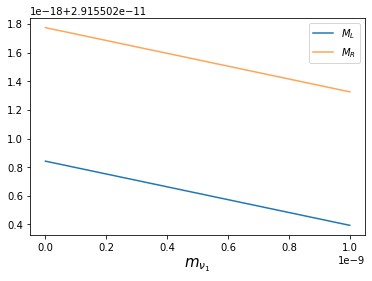

In [83]:
plt.plot(mnunp,MLlin,label='$M_L$');
plt.plot(mnunp,MRlin,label='$M_R$',alpha=0.7);
plt.xlabel(r'$m_{\nu_1}$',fontsize=15)
plt.legend();

# Widht

In general amplitudes to process as $S \rightarrow F_1\overline{F_2}$, where S and F denote scalar and fermion respectively, have the form [Goodsell 2017](https://arxiv.org/pdf/1512.03266.pdf):

$$
\mathcal{M} = M_L \overline{u}(p_1)P_L v(p_2) + M_R \overline{u}(p_1)P_R v(p_2) 
$$

where $M_{L,R}$ are scalar factors, $u(p_1)$ and $v(p_2)$ are respective Dirac Spinors of the $F_1$ and $F_2$. Also, when $S = h$, $F_1 = \mu$ and $F_2=\tau$, the partial width of the decay is ([Hue:2015fbb](https://arxiv.org/pdf/1512.03266.pdf),[Thuc:2016](https://arxiv.org/pdf/1604.03285.pdf))

$$
\Gamma(h \rightarrow \mu \tau) \equiv \Gamma(h \rightarrow \mu^{-} \tau^{+}) + \Gamma(h \rightarrow \mu^{+} \tau^{-}) 
 = \frac{1}{8 \pi m_h}\sqrt{\left[1-\left( \frac{m_1^2 + m_2^2}{m_h} \right)^2  \right]  \left[1-\left( \frac{m_1^2 - m_2^2}{m_h} \right)^2  \right]}
 \left[ (m_h^2 -m_1^2 - m_2^2)(|M_L|^2 + |M_R|^2) - 4 m_1 m_2 \text{Re}(M_L M_R^{*}) \right] 
$$
where $m_h$, $m_1$ and $m_2$ correspond to $h$, $\mu$ and $\tau$ masses, respectively. The onshell conditions to this process are $p_i^2 = m_i^2 $  and $p_0^2 \equiv (p_1 + p_2)^2 = m_h^2$.

In [84]:
# Definimos la formula para el ancho de decaimiento
#mh, m1, m2 = symbols('m_h, m_1, m_2',real=True)
ML,MR = symbols('ML,MR')
def Γhτμ(ML,MR,mh=125,m1=1.777,m2=0.1507): 
    return 1/(8 *np.pi* mh)*np.sqrt((1-((m1**2+m2**2)/mh)**2)*(1-((m1**2-m2**2)/mh)**2))*((mh**2 - m1**2 - m2**2)*(np.abs(ML)**2 + np.abs(MR)**2)-4*m1*m2*np.real(ML*np.conj(MR)))
Γhτμ(1+0.1j,1+0.1j)

In [85]:
x = np.array([1+0.1j,1+0.1j])
y = np.array([1+0.1j,1+0.1j])
Γhτμ(x,y)

array([10.03785625, 10.03785625])

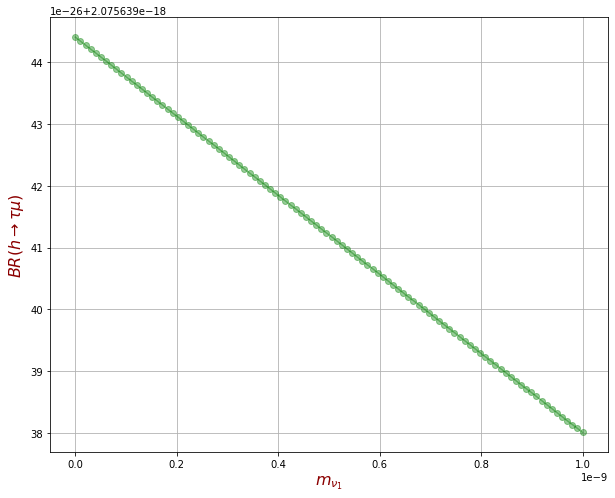

In [86]:
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }
plt.figure(figsize=(10,8))
plt.plot(mnunp,Γhτμ(MLlin ,MRlin)/(Γhτμ(MLlin ,MRlin) + 4.07e-3),
         'go-',alpha=0.4)
#plt.xticks([], [])
#plt.legend()
#plt.title('');
plt.xlabel(r'$m_{\nu_1}$',fontdict=font);
plt.ylabel(r'$BR(h\rightarrow \tau \mu)$',fontdict=font);
plt.grid();

usando 
$$
\left|Y_{\ell \tau}\right|^{2}+\left|Y_{\tau \ell}\right|^{2}=\frac{8 \pi}{m_{h}} \frac{\mathcal{B}(h \rightarrow \ell \tau)}{1-\mathcal{B}(h \rightarrow \ell \tau)} \Gamma_{h}(\mathrm{SM})
$$
y 
$$
\sqrt{\left|Y_{\tau e}\right|^{2}+\left|Y_{e \tau}\right|^{2}}<0.0020, \quad
\sqrt{\left|Y_{\tau \mu}\right|^{2}+\left|Y_{\mu \tau}\right|^{2}}<0.0015
$$